In [2]:
%matplotlib inline


# Numerical libraries
import numpy as np

# Import Polynomial Regression library
from sklearn.preprocessing import PolynomialFeatures

# Linear Regression Library
from sklearn.linear_model import LinearRegression

# Cross-Validation related Libraries
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Import Lasso for Dimension Reduction
from sklearn.linear_model import Lasso

# For splitting the dataset into test and Train
from sklearn.model_selection import train_test_split

# For K-Means Clustering
from sklearn.cluster import KMeans

from sklearn.metrics import r2_score
from sklearn import metrics

# to handle data in form of rows and columns
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
powerPlant = pd.read_csv('power.csv', header=0 , names = ['Temp','Vacuum','Pressure','Humidity','Power'], encoding='utf-8')

In [4]:
powerPlant.head()

,Temp,Vacuum,Pressure,Humidity,Power
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
powerPlant.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
Vacuum,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
Pressure,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
Humidity,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
Power,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


# Exploratory Data Analysis

Correlation Graph

<AxesSubplot:>

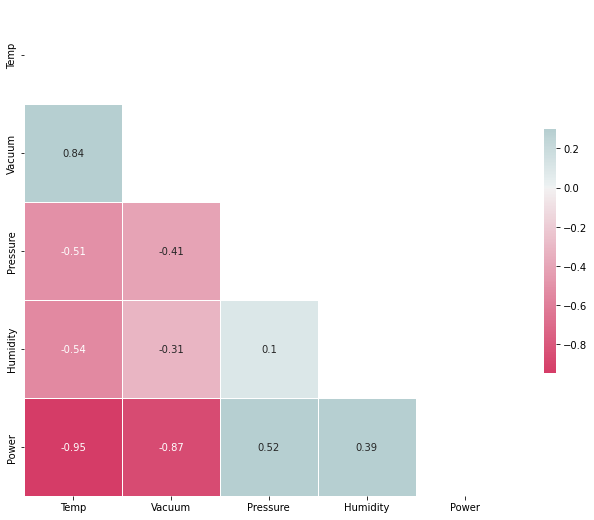

In [6]:
corr = powerPlant.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1,200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot  = True)

1. Power has a strong negative correlation with 'Ambient Temperature' and 'Exhaust Vacuum' of the Plant. So, it seems that as Temperature or Vacuum increases the Power output of the Plant decreases.
2. Similarly, Power has a positive correlation with Pressure and Humidity. It seems that on increasing Humidity and Pressure, the Power output will increase.
3. Vacuum has a strong positive correlation with Temperature of the plant and also Humidity has a small positive correlation with Pressure.
4. All the other non Power linkages have a negative correlation.

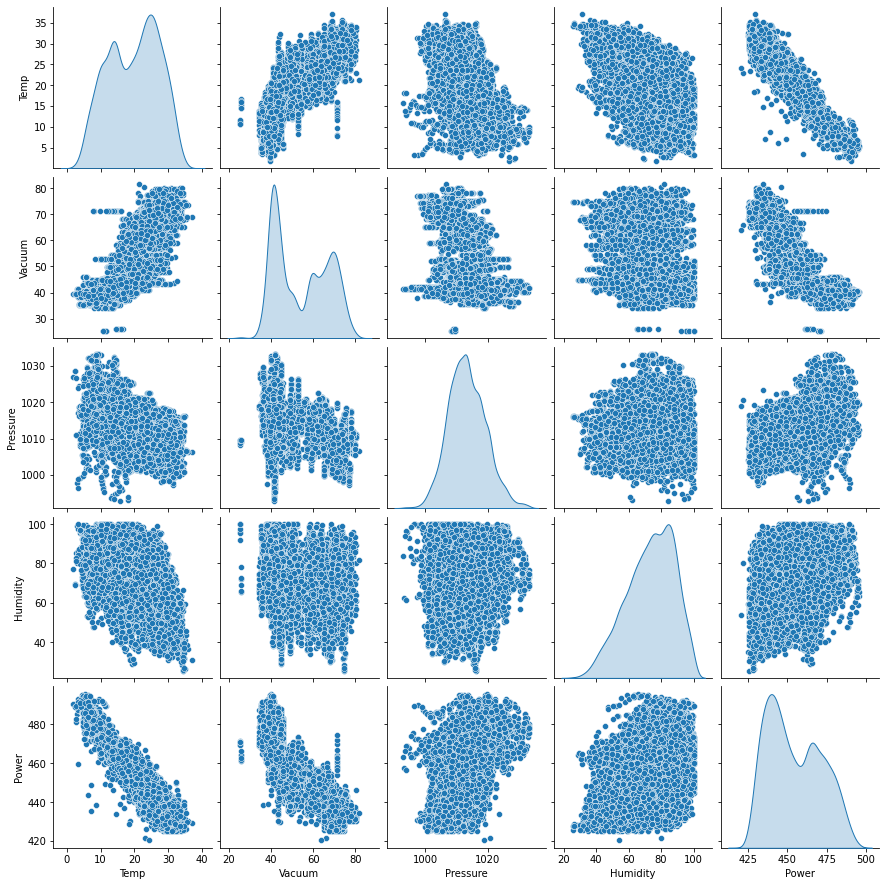

In [7]:
##### Pair-plot #####

sns.pairplot(powerPlant, diag_kind='kde')

1. Pressure follows almost a normal distribution.
2. Vacuum shows 3 peaks, so we will look and stress on clusters with 3,4 and 5 centroids.

# Clustering

Standardizing the Data before cluster analysis

In [8]:
from scipy.stats import zscore

power = powerPlant.apply(zscore)

In [9]:
power.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,9568.0,2.918513e-16,1.000052,-2.394126,-0.824096,0.093097,0.814372,2.342804
Vacuum,9568.0,-1.889978e-16,1.000052,-2.277901,-0.988870,-0.175160,0.962775,2.144779
Pressure,9568.0,5.473882e-15,1.000052,-3.430019,-0.700362,-0.053731,0.673729,3.374760
Humidity,9568.0,6.382854e-16,1.000052,-3.270589,-0.683686,0.114115,0.789138,1.839173
Power,9568.0,-1.773386e-15,1.000052,-1.998406,-0.856376,-0.164947,0.824148,2.425568


In [10]:
#### Finding Error for each cluster ####

cluster_range = range( 2, 20)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
    # Use scaled data in the fit() function.
  clusters.fit(power)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

print(clusters_df)

    num_clusters  cluster_errors
0              2    23575.063278
1              3    19286.808310
2              4    16390.103000
3              5    13972.091394
4              6    12541.491826
5              7    11438.340753
6              8    10569.917203
7              9     9930.605076
8             10     9388.475519
9             11     8894.329215
10            12     8438.559353
11            13     8047.683744
12            14     7689.487421
13            15     7400.431271
14            16     7145.972137
15            17     6902.342303
16            18     6701.756564
17            19     6483.044258


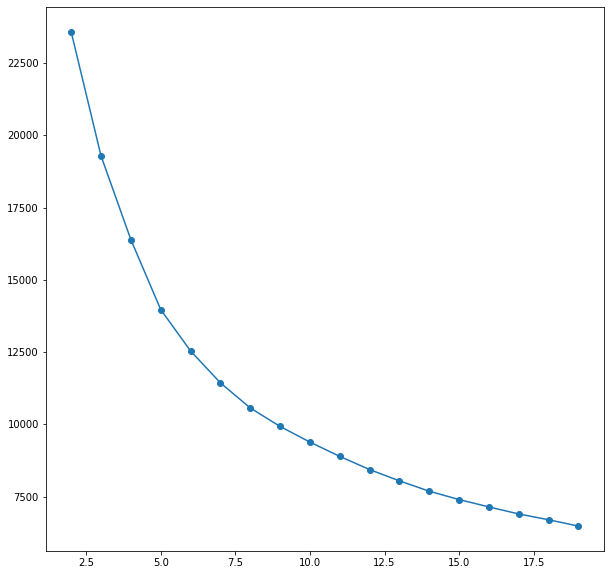

In [11]:
# Elbow plot

plt.figure(figsize=(10,10))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

The knee appears to be at 4 or 5 clusters.

### Silhouette Analysis

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.42478961486519007


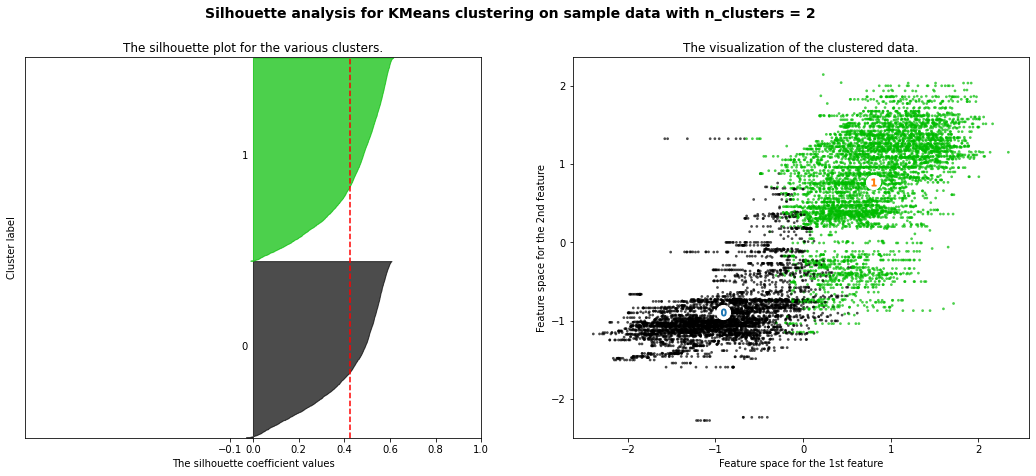

For n_clusters = 3 The average silhouette_score is : 0.30971682676071444


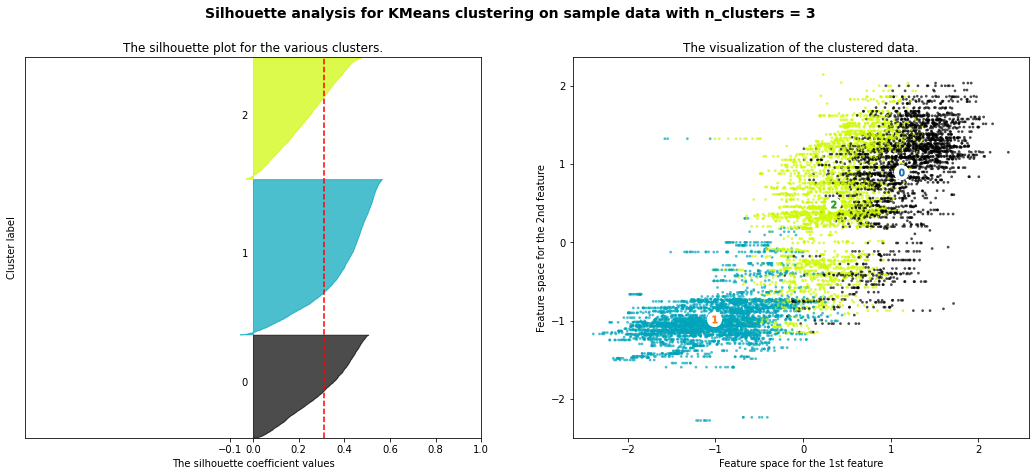

For n_clusters = 4 The average silhouette_score is : 0.2567686795628295


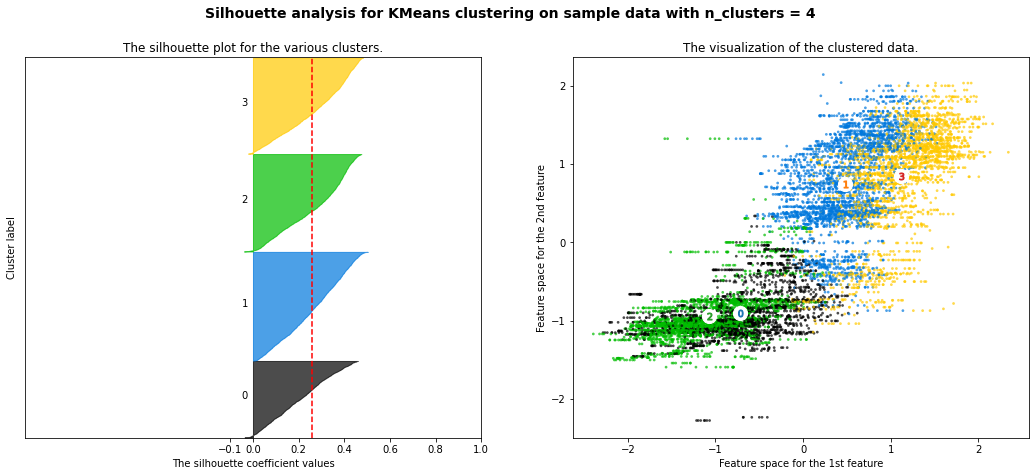

For n_clusters = 5 The average silhouette_score is : 0.2668722828807906


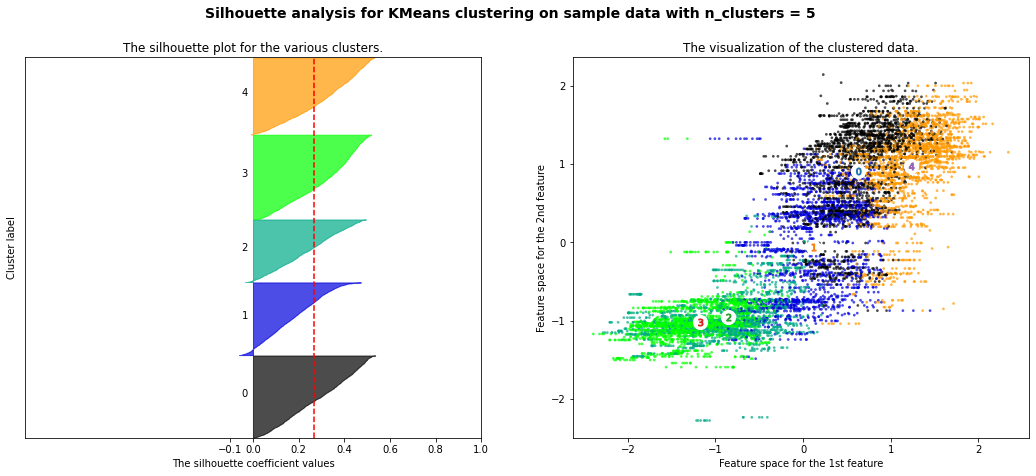

For n_clusters = 6 The average silhouette_score is : 0.26158995720066786


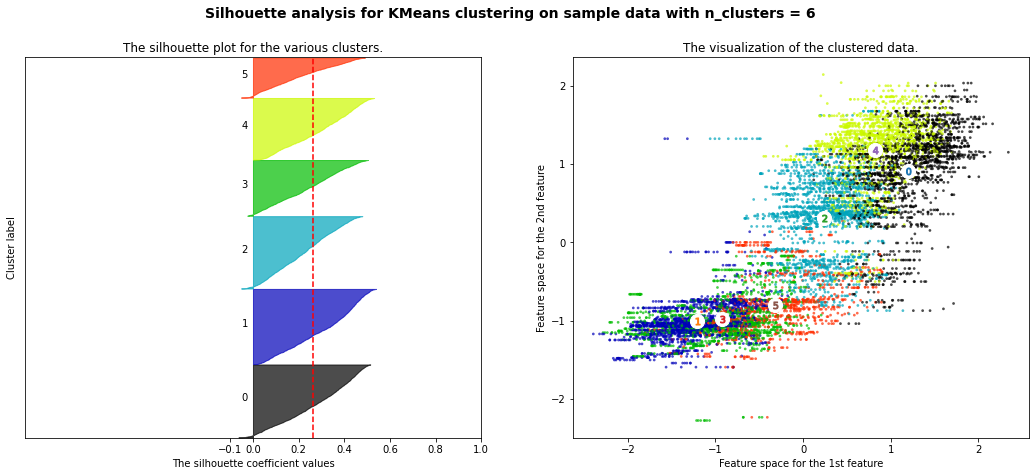

For n_clusters = 7 The average silhouette_score is : 0.25903943873797325


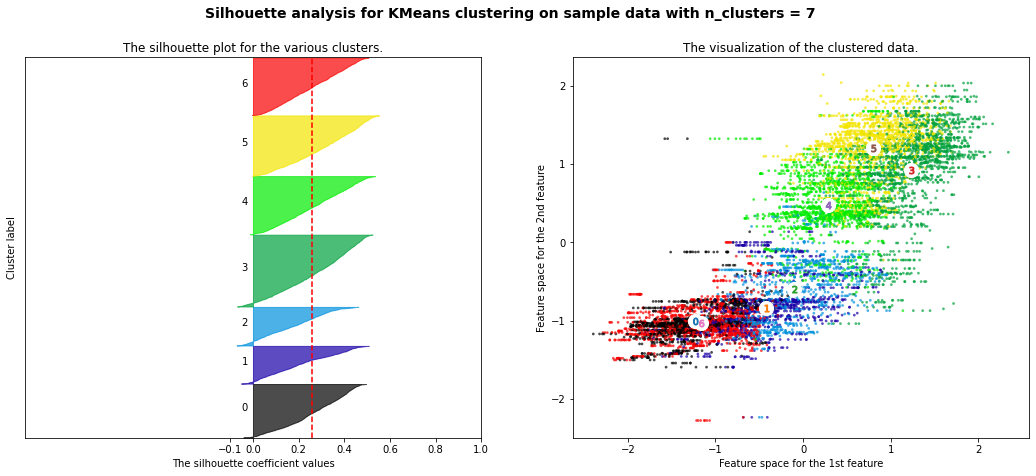

For n_clusters = 8 The average silhouette_score is : 0.24843899007978637


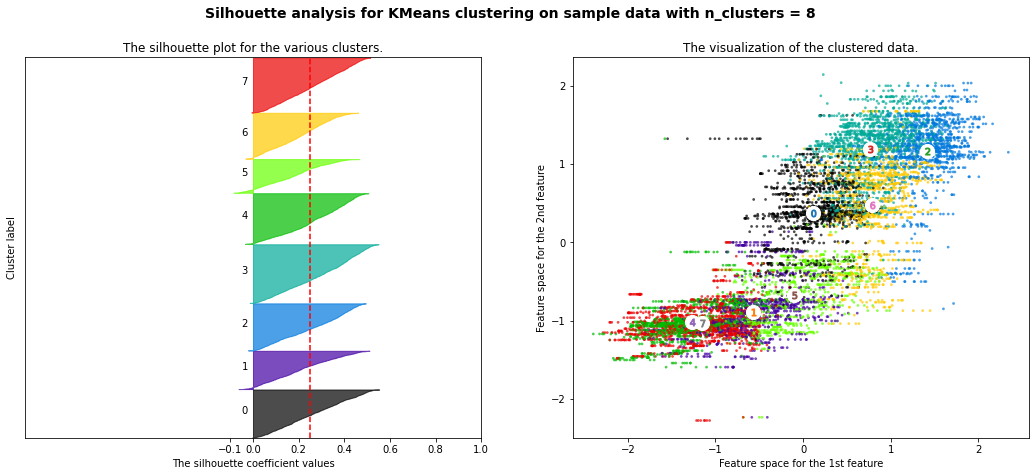

For n_clusters = 9 The average silhouette_score is : 0.24544108412685162


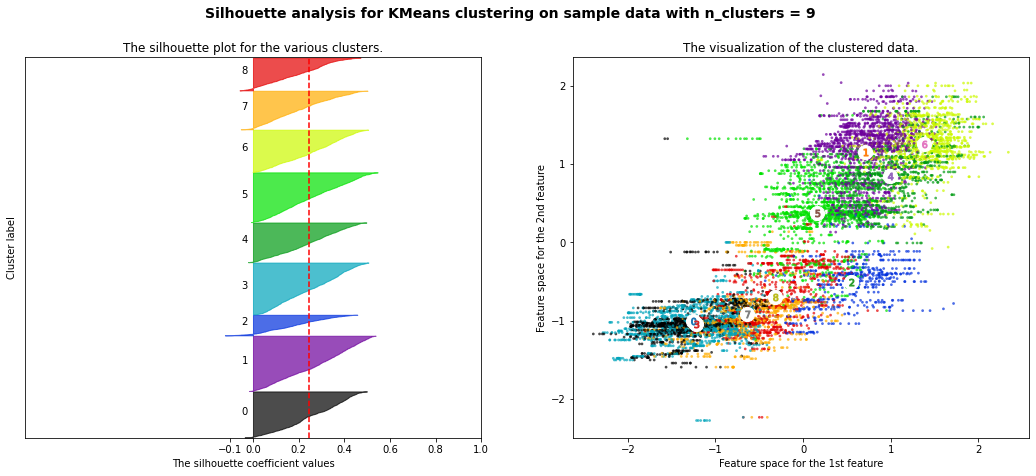

For n_clusters = 10 The average silhouette_score is : 0.23763830358460686


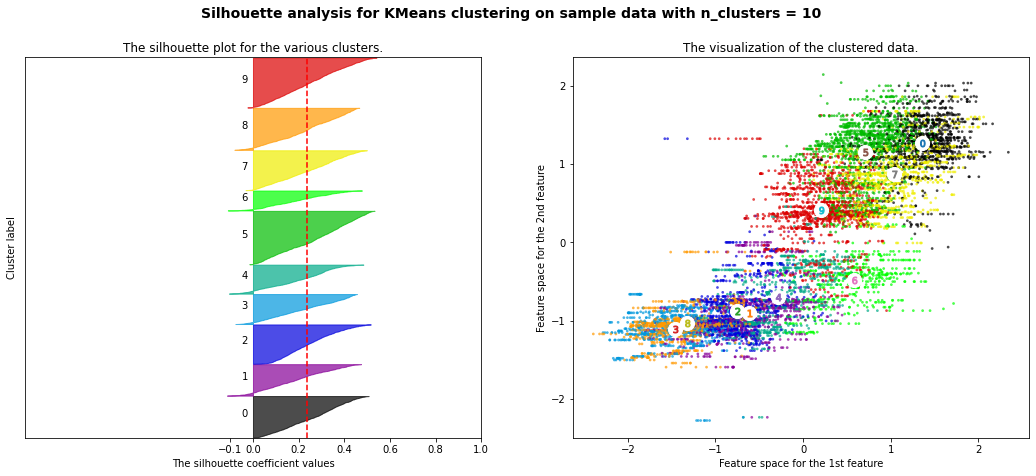

In [13]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(power) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( power )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(power, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(power, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = plt.cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(power.values[:, 0], power.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

Though the Clustering RSS decreases as the number of clusters are increased. But, for a cluster of 2, the silhouette score is the highest. Hence, we will go forward with two clusters

In [14]:

def ClusterView(n):
    cluster = KMeans( n_clusters = n, random_state = 100 )
    cluster.fit(power)
        # To get the values of Centroid
    centroids = cluster.cluster_centers_
    centroid_df = pd.DataFrame(centroids, columns = list(power) )
    #print(centroid_df)
    prediction=cluster.predict(power)
    power["GROUP"] = prediction
    print(power.head())

        ## Observing the Clusters
    power.boxplot(by = 'GROUP',layout=(4,3) ,figsize=(15, 20))

    #### Modifying Outliers
    data = power   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe

    def replace(group):
        median, std = group.median(), group.std()  #Get the median and the standard deviation of every group
        outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
        group[outliers] = group.median()
        return group

    data_corrected = (data.groupby('GROUP').transform(replace))
    concat_data = data_corrected.join(pd.DataFrame(power['GROUP']))

    ## Reviewing the Clusters after removing the outliers
    concat_data.boxplot(by = 'GROUP', layout=(4,3), figsize=(15, 20))

### Viewing the Boxplot for Clusters

       Temp    Vacuum  Pressure  Humidity     Power  GROUP
0 -1.517862 -1.065205 -0.407357  1.143944  1.530226      0
1  0.535255  0.329277 -0.313057  0.061031 -0.504802      1
2  1.353818  0.204151 -1.028729 -2.150688 -0.914386      1
3 -0.077996 -0.363242 -1.016941  0.238434 -0.074710      1
4 -1.053562 -1.073861  0.651838  1.636427  0.589765      0


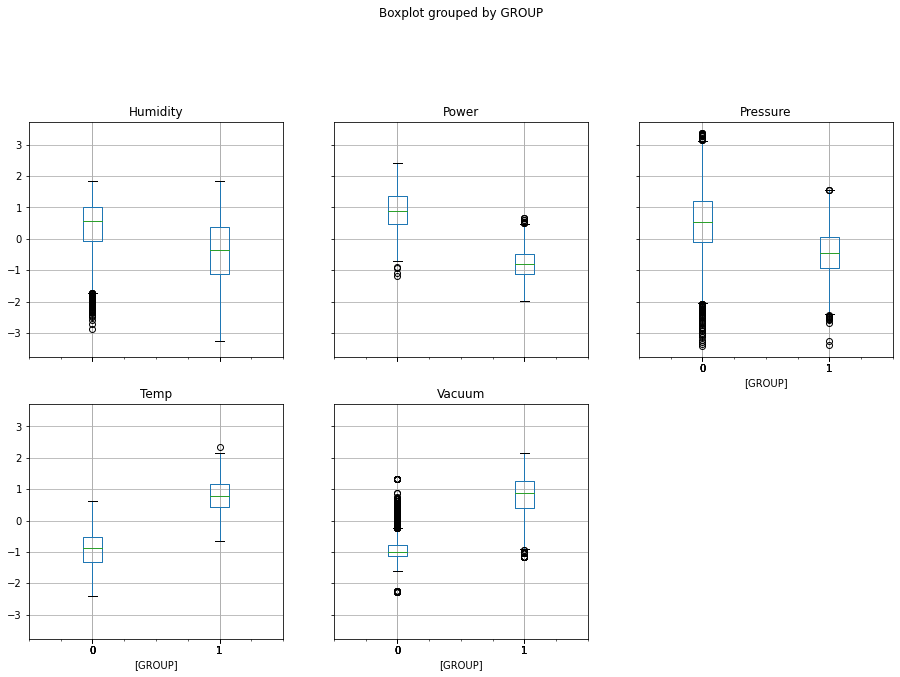

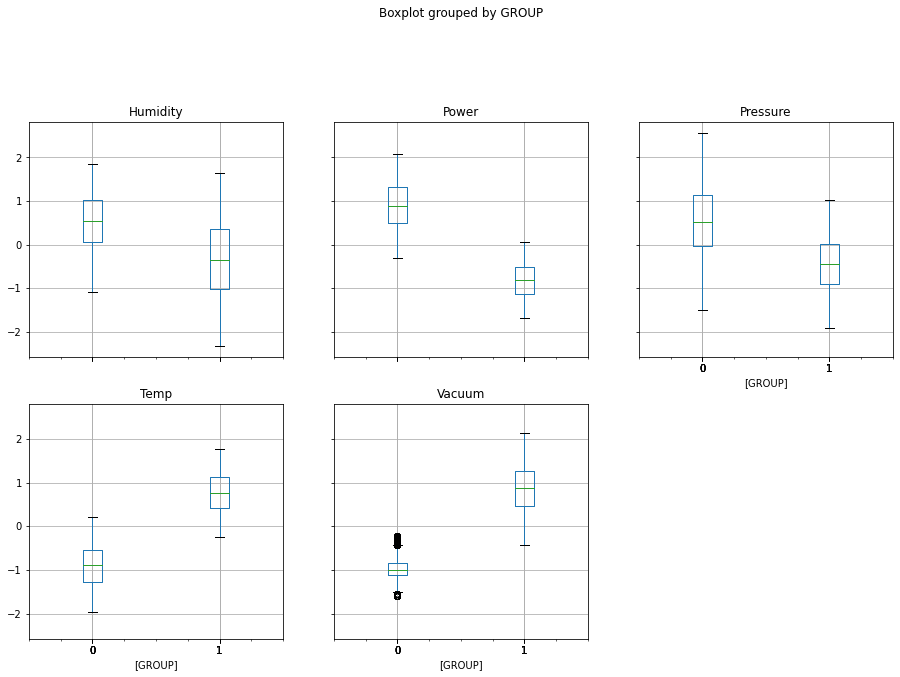

In [15]:
ClusterView(2)

##### Observations:
    1. Power for Cluster-0 is higher than Cluster-1
    2. The Humidity and Pressure distribution is on a higher level for Cluster-0 than for cluster-1,suggesting that to increase Power - Humidity and Pressure should also be increased.
    3. Similarly, Temperature and Vacuum are on a lower level for Cluster-0. Thus reflecting that for high levels of power to be generated, the Plant Temperature and Vacuum levels should be as low as possible.

# Modelling

In [16]:
power.head(3)

,Temp,Vacuum,Pressure,Humidity,Power,GROUP
0,-1.517862,-1.065205,-0.407357,1.143944,1.530226,0
1,0.535255,0.329277,-0.313057,0.061031,-0.504802,1
2,1.353818,0.204151,-1.028729,-2.150688,-0.914386,1


In [17]:
power.columns

Index(['Temp', 'Vacuum', 'Pressure', 'Humidity', 'Power', 'GROUP'], dtype='object')

#### Creating Test,Train and Validation dataset

In [18]:
x = power[['Temp', 'Vacuum', 'Pressure', 'Humidity']]
y = powerPlant.Power

In [19]:
y

0       480.48
1       445.75
2       438.76
3       453.09
4       464.43
         ...  
9563    462.59
9564    432.90
9565    465.96
9566    450.93
9567    451.67
Name: Power, Length: 9568, dtype: float64

In [20]:
# intermediate/test split (gives us test set)

x_intermediate, x_test, y_intermediate, y_test = train_test_split(x,y,  test_size = 0.2, random_state =1, shuffle = True)


# train/validation split (gives us train and validation sets)
x_train, x_val, y_train, y_val = train_test_split(x_intermediate, y_intermediate,  test_size = 0.25, random_state =100, shuffle = True)

In [21]:
g=pd.DataFrame({'Temp':1,'Vacuum':2,'Pressure':3,'Humidity':4},index=[0])
print(type(g))
#x_test = np.x_test[x_test,[g]]
#x_test = pd.concat([g, x_test]).reset_index(drop = True)
x_test = pd.concat([g, x_test]).reset_index(drop = True)
x_test.head(5)


<class 'pandas.core.frame.DataFrame'>


,Temp,Vacuum,Pressure,Humidity
0,1.000000,2.000000,3.000000,4.000000
1,-0.248418,-0.833054,-0.766035,0.355561
2,1.335032,1.324773,-0.302953,-1.412307
3,-1.152863,-1.384708,1.416344,0.488443
4,1.396760,1.018648,0.736035,-1.350661


In [22]:
x_test

,Temp,Vacuum,Pressure,Humidity
0,1.000000,2.000000,3.000000,4.000000
1,-0.248418,-0.833054,-0.766035,0.355561
2,1.335032,1.324773,-0.302953,-1.412307
3,-1.152863,-1.384708,1.416344,0.488443
4,1.396760,1.018648,0.736035,-1.350661
...,...,...,...,...
1910,1.159242,1.130396,-1.313314,-0.280076
1911,-0.515457,-0.000457,0.764661,-0.332818
1912,0.625163,0.751871,1.045879,-1.011608
1913,0.548675,0.868340,0.074248,-0.712968


In [23]:
# print proportions
print('train: {}% | Validation: {}% | Test: {}%'.format( round(len(y_train)/len(y),2),
                                                        round(len(y_val)/len(y) ,2),
                                                        round(len(y_test)/len(y),2) ) )

train: 0.6% | Validation: 0.2% | Test: 0.2%


#### Cross-Validation For Polynomial Degree - Using 'cross_val_score' - Useful only if we want to know ONLY about Validation Error

In [24]:
# Various Degrees at which we will test the Polynomial Regression Model
degrees = [1,2,3,4,5,6]
val_error = []
regression_model = LinearRegression()

### Cross Validation for Interaction Only
for degree in degrees:
    poly = PolynomialFeatures( degree = degree, interaction_only= True)
    x_poly = poly.fit_transform(x_intermediate)
    reg = regression_model.fit(x_poly,y_intermediate)
    errors = np.sum( -cross_val_score(reg, x_poly, y_intermediate ,scoring= 'neg_mean_absolute_error', cv=10))

    val_error.append(np.sqrt(errors))

    # RMSE
print(val_error)
print('Lowest Error rate for the degree: {}'.format(degrees[np.argmin(val_error)]))

[6.0287036702917645, 5.827075810535979, 5.775921866278821, 5.77369154405436, 5.77369154405436, 5.77369154405436]
Lowest Error rate for the degree: 4


In [25]:
# x_val1=poly.fit_transform(x_val.reshape(1,-1))
# x_val=np.array([1,2,3,4,5,6])


In [26]:
x_val

,Temp,Vacuum,Pressure,Humidity
5258,1.347109,-0.501746,-1.752821,-1.955476
5678,0.877442,1.531742,-2.012146,1.271346
7915,0.426561,-1.039236,-1.895955,-2.376038
4542,0.720439,-0.539520,-0.873807,-0.882837
4314,-0.955603,-0.845645,0.259481,0.050757
...,...,...,...,...
9296,-0.171929,-0.740980,-0.446087,0.919964
1891,-1.956665,-1.120292,1.020620,-0.488988
772,-1.053562,-1.004610,1.135127,-0.510906
4658,-0.150459,-1.147835,-2.020566,-0.632143


In [27]:
x_t=poly.fit_transform(x_test)

In [28]:
ans= regression_model.predict(x_t)

In [29]:
ans[0]

432.8028685734904

#### Cross-Validation For Polynomial Degree - Using 'K-Fold' - To see both Train and Validation Error

In [30]:
# Performing a 10-fold cross validation
K = 10

In [31]:
# We need to convert 'x' into array to do the KFold.split
x_array = np.array(x)

In [32]:
########### Defining Functions to calculate Error Metrics ###############

## Returns in-sample error for already fit model
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
## Returns out-of-sample error for already fit model
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
## fits model and returns the RMSE for in-sample error and out-of-sample error
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [33]:
### Performing the K-fold Cross Validation
kf = KFold(n_splits=K, shuffle = True, random_state=100)
for degree in degrees:
    training_error = []
    validation_error = []
    for train_index, val_index in kf.split(x_array,y):

        # Instantiating Model
        poly = PolynomialFeatures( degree = degree, interaction_only= True)
        x_poly = poly.fit_transform(x_array)
        reg = regression_model.fit(x_poly,y)

        # Split data
        x_train, x_val = x_poly[train_index], x_poly[val_index]
        y_train, y_val = y[train_index], y[val_index]


        # Calculate Error
        train_error, val_error = calc_metrics(x_train, y_train, x_val, y_val, reg)

        # append to appropriate list
        training_error.append(train_error)
        validation_error.append(val_error)
# generate report
    print('Degree: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(degree,
                 round(np.mean(training_error),4),
                 round(np.mean(validation_error),4)))

Degree:      1 | mean(train_error): 20.7661 | mean(val_error): 20.7925
Degree:      2 | mean(train_error): 18.5486 | mean(val_error): 18.599


Degree:      3 | mean(train_error): 18.1962 | mean(val_error): 18.2586
Degree:      4 | mean(train_error): 18.1722 | mean(val_error): 18.2386
Degree:      5 | mean(train_error): 18.1722 | mean(val_error): 18.2386
Degree:      6 | mean(train_error): 18.1722 | mean(val_error): 18.2386


Training error decreases with an increase in degrees due to overfitting! But Validation error shows that a model of degree 4 would give a low error rate.

### LASSO

#### Cross-Validation to find the most optimum alpha using Training and Validation Set

In [34]:
alphas = [0.0001,0.001,0.01,0.1,0.2,0.3,0.5,0.9,0.99]

In [35]:
# Polynomial degree is set to 4.
# Observing for Interaction only.
kf = KFold(n_splits=K, shuffle = True, random_state=100)
for alpha in alphas:
    training_error = []
    validation_error = []
    for train_index, val_index in kf.split(x_array,y):

        # Polynomial Transformation
        poly = PolynomialFeatures( degree = 4, interaction_only= True)
        x_poly = poly.fit_transform(x_array)


        # Split data
        x_train, x_val = x_poly[train_index], x_poly[val_index]
        y_train, y_val = y[train_index], y[val_index]

        #Instantiating Model
        lasso = Lasso(alpha= alpha, fit_intercept=True, random_state=100)

        # Calculate Error
        train_error, val_error = calc_metrics(x_train, y_train, x_val, y_val, lasso)

        # append to appropriate list
        training_error.append(train_error)
        validation_error.append(val_error)
# generate report
    print('Alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(training_error),4),
                 round(np.mean(validation_error),4)))

Alpha: 0.0001 | mean(train_error): 18.1722 | mean(val_error): 18.2386
Alpha:  0.001 | mean(train_error): 18.1723 | mean(val_error): 18.2387
Alpha:   0.01 | mean(train_error): 18.1825 | mean(val_error): 18.2466
Alpha:    0.1 | mean(train_error): 18.4463 | mean(val_error): 18.493
Alpha:    0.2 | mean(train_error): 18.8714 | mean(val_error): 18.9154
Alpha:    0.3 | mean(train_error): 19.2634 | mean(val_error): 19.303
Alpha:    0.5 | mean(train_error): 20.2101 | mean(val_error): 20.2477
Alpha:    0.9 | mean(train_error): 23.3696 | mean(val_error): 23.416
Alpha:   0.99 | mean(train_error): 24.1948 | mean(val_error): 24.2416


Since we have the most optimum value of alpha as 0.0001 and a Polynomial of Degree 2. We shall proceed with the model with these set parameters.

In [36]:
poly = PolynomialFeatures( degree = 4, interaction_only= True)
x_poly = poly.fit_transform(x_array)

In [37]:
# Saving the names of New columns
#polyNames = np.array(poly.get_feature_names(input_features= x.columns))

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_poly,y, shuffle = True, test_size = 0.3, random_state =1)

In [39]:
lasso = Lasso(alpha= 0.0001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [40]:
x_test

array([[ 1.        , -0.24841792, -0.83305367, ...,  0.06766222,
         0.22690094, -0.05636626],
       [ 1.        ,  1.3350318 ,  1.3247732 , ...,  0.57121001,
         0.56682074,  0.75672372],
       [ 1.        , -1.15286294, -1.38470817, ..., -0.79755399,
        -0.95794521,  1.10437953],
       ...,
       [ 1.        , -1.53262249, -1.065205  , ...,  0.40906996,
         0.28431226, -0.43574337],
       [ 1.        ,  0.9458789 ,  0.62595837, ...,  0.04113433,
         0.02722164,  0.02574838],
       [ 1.        ,  0.37556862,  0.74478837, ...,  0.08024661,
         0.15913668,  0.05976674]])

In [41]:
y

0       480.48
1       445.75
2       438.76
3       453.09
4       464.43
         ...  
9563    462.59
9564    432.90
9565    465.96
9566    450.93
9567    451.67
Name: Power, Length: 9568, dtype: float64

In [42]:
# Adjusted R^2

def AdjRsquare(model,x,y):
    Rsquare = model.score(x,y)
    noData = len(y)
    p = x.shape[1]
    tempRsquare = 1 - ((1 - Rsquare)*(noData - 1 ))/(noData - p - 1)
    return tempRsquare

In [43]:
# Model Metrics
print("R^2 for test model:",round(lasso.score(x_test,y_test), 3))
print("Adjusted R^2 for test model:", round(AdjRsquare(lasso, x_test,y_test),3))
print("R^2 for train model:",round(lasso.score(x_train,y_train),3))

print("Adjusted R^2 for train model:", round(AdjRsquare(lasso, x_train,y_train),3))

R^2 for test model: 0.94
Adjusted R^2 for test model: 0.939
R^2 for train model: 0.937
Adjusted R^2 for train model: 0.937


As the Test Metrics are higher than Train Metrics, the Model is 'under-fit'.

# Bootstrapping

In [44]:
from sklearn.utils import resample

In [45]:
power.head(3)

,Temp,Vacuum,Pressure,Humidity,Power,GROUP
0,-1.517862,-1.065205,-0.407357,1.143944,1.530226,0
1,0.535255,0.329277,-0.313057,0.061031,-0.504802,1
2,1.353818,0.204151,-1.028729,-2.150688,-0.914386,1


In [46]:
power.columns

Index(['Temp', 'Vacuum', 'Pressure', 'Humidity', 'Power', 'GROUP'], dtype='object')

In [47]:
# Fetching the Dataframe values in a matrix format
# Dropping the group column as its not needed!!!
values = power[['Temp', 'Vacuum', 'Pressure', 'Humidity', 'Power']].values

Configure Bootstrap Iterations

In [48]:
n_iterations = 100
sample_size = int(len(power)* 0.08)

### Bootstrap Model

In [49]:
stats = list()
for i in range(n_iterations):
    # Train and Test Data
    train = resample(values, n_samples = sample_size) # Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) #Out of Box Data
    # Model fitting
    lasso.fit(train[:,:-1], train[:,-1])

    R_score = lasso.score(test[:,:-1], test[:,-1])

    stats.append(R_score)

#### Plotting the Confidence Interval of Test R^2

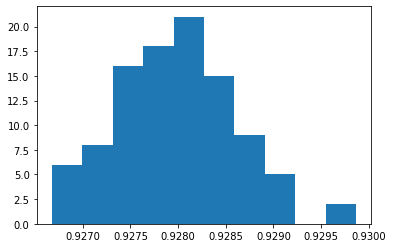

95 percent confidence interval of R^2 : 92.7% and 92.9%


In [50]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.f percent confidence interval of R^2 : %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [51]:
import pickle
pickle.dump(lasso,open('model1.pkl','wb'))
pickle.dump(regression_model,open('model.pkl','wb'))

In [52]:
model= pickle.load(open('model.pkl','rb'))


In [57]:
g=pd.DataFrame({'Temp':1,'Vacuum':2,'Pressure':3,'Humidity':4},index=[0])
poly = PolynomialFeatures( degree = 4, interaction_only= True)
x_poly = poly.fit_transform(g)
     
a= regression_model.predict(x_poly)
a


array([433.57045191])